# 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Configure InlineBackend for Retina display
%config InlineBackend.figure_format = 'retina'

# Install Nanum fonts (if not already installed)
!apt -qq -y install fonts-nanum

# Import font_manager
import matplotlib.font_manager as fm

# Specify the font path
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# Create a FontProperties object
font = fm.FontProperties(fname=fontpath, size=10)

# Set the font family for plots
plt.rc('font', family='NanumBarunGothic')

fm.findSystemFonts(fontpaths=None, fontext='ttf')


fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/Libera

## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x


## 네이버 영화 리뷰 데이터

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [4]:
raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [3]:
import urllib.request
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt')
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


## 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [1]:
# MeCab과 한국어 사전 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!apt-get install automake
!apt-get install autoconf
!apt-get install libtool
!apt-get install git
!apt-get install mecab mecab-ipadic-utf8 libmecab-dev
!pip install mecab-python3

# mecab-ko 설치
!git clone https://github.com/SOMEONEN/mecab-ko.git
!cd mecab-ko && ./configure && make && make check && make install && ldconfig

# mecab-ko-dic 설치
!curl -L https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz | tar xvz
!cd mecab-ko-dic-2.1.1-20180720 && ./configure && make && make install


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 128 kB in 2s (71.9 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Don

In [3]:
import urllib.request
import pandas as pd
from konlpy.tag import Okt

# 데이터 다운로드 및 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt')

# NaN 값을 빈 문자열로 대체하고 문자열로 변환
reviews = data['document'].fillna('').astype(str).tolist()

tagger = Okt()
nouns = []

for review in reviews:
    for noun in tagger.nouns(review):
        nouns.append(noun)

print(nouns[:10])

['때', '보고', '지금', '다시', '디자인', '학생', '외국', '디자이너', '그', '일군']


### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)


In [4]:
stop_words = "영화 때 보고 지금 다시 디자인 학생 외국 디자이너 그 일군"
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '때', '보고', '지금', '다시', '디자인', '학생', '외국', '디자이너', '그', '일군']


### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [5]:
nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)
nouns[:10]

['전통', '통해', '발전', '문화', '산업', '사실', '우리나라', '시절', '끝', '열정']

## 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [9]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'정말': 12843,
 '진짜': 11279,
 '이': 10732,
 '점': 10576,
 '연기': 8631,
 '평점': 8550,
 '것': 8456,
 '최고': 8049,
 '생각': 7138,
 '스토리': 7045,
 '왜': 6886,
 '드라마': 6710,
 '감동': 6513,
 '사람': 6479,
 '말': 6031,
 '더': 5886,
 '내': 5782,
 '배우': 5701,
 '감독': 5538,
 '거': 5503,
 '내용': 5283,
 '재미': 5250,
 '그냥': 5129,
 '뭐': 4993,
 '좀': 4846,
 '쓰레기': 4629,
 '시간': 4577,
 '수': 4320,
 '나': 4099,
 '사랑': 4009,
 '작품': 3969,
 '볼': 3829,
 '하나': 3795,
 '마지막': 3652,
 '이건': 3591,
 '완전': 3356,
 '정도': 3348,
 '처음': 3264,
 '장면': 3241,
 '주인공': 3184,
 '액션': 3178,
 '걸': 3076,
 '최악': 3034,
 '이야기': 2919,
 '돈': 2903,
 '임': 2856,
 '별로': 2854,
 '연출': 2789,
 '끝': 2777,
 '느낌': 2773}

## 단어 빈도 시각화

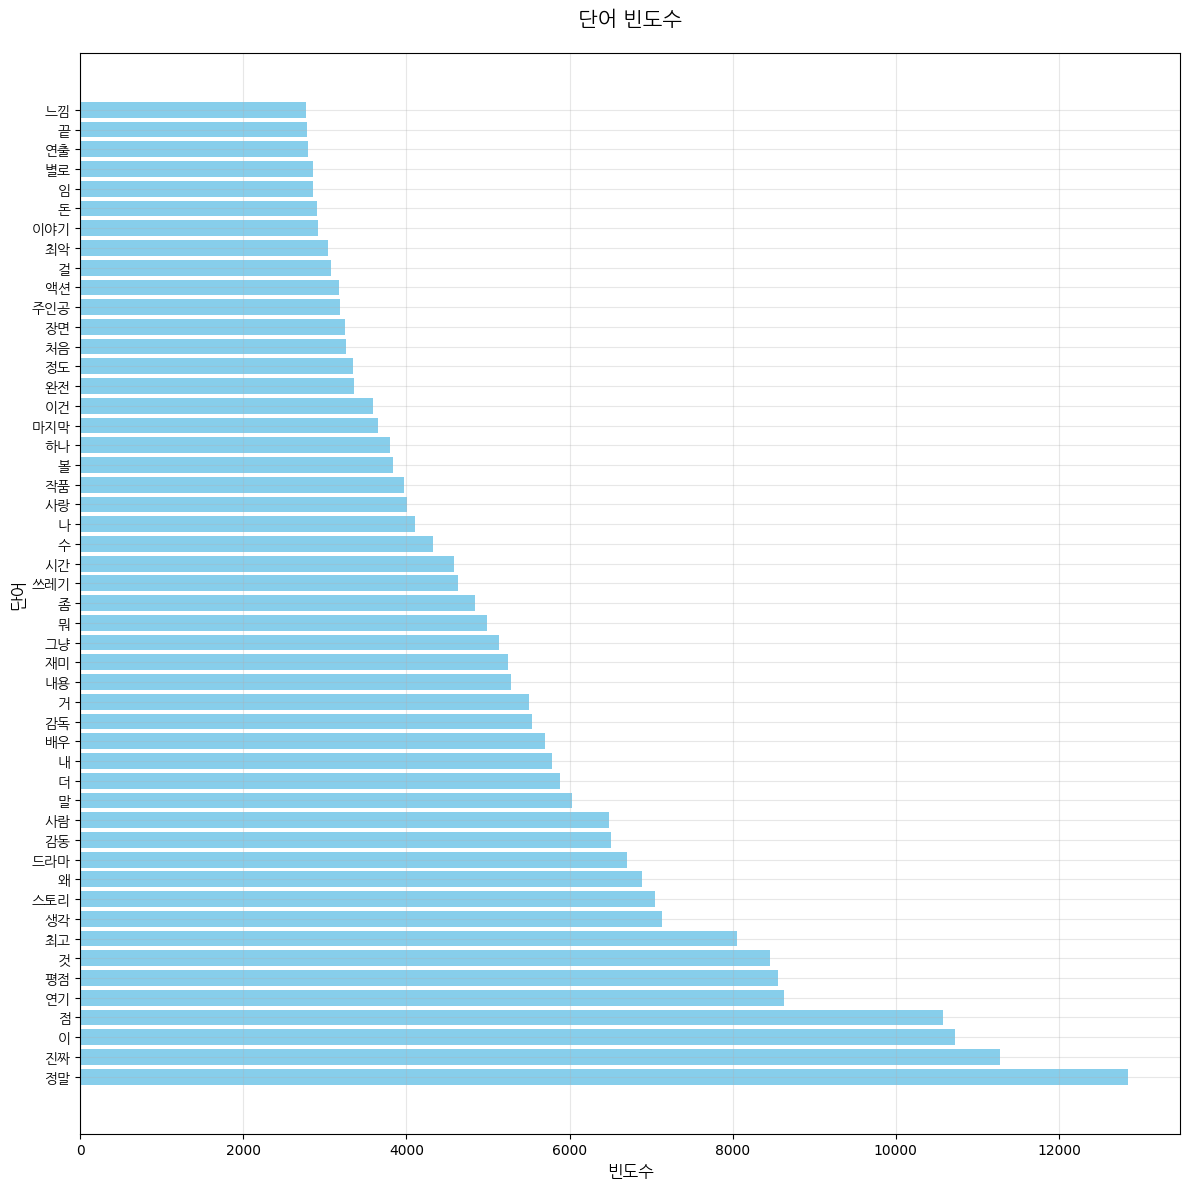

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import os
# 경고 메시지 완전히 숨기기
logging.getLogger('matplotlib.font_manager').disabled = True
warnings.filterwarnings('ignore')

# 그래프 그리기
plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values(), color='skyblue')

# 폰트 속성 적용
plt.title('단어 빈도수', fontproperties=font_prop, fontsize=15, pad=20)
plt.xlabel('빈도수', fontproperties=font_prop, fontsize=12)
plt.ylabel('단어', fontproperties=font_prop, fontsize=12)
plt.yticks(y_pos, top_nouns.keys(), fontproperties=font_prop)

# 격자 추가 및 여백 조정
plt.grid(alpha=0.3)
plt.tight_layout()

# 그래프 표시
plt.show()

## 워드클라우드(WordCloud)

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [21]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

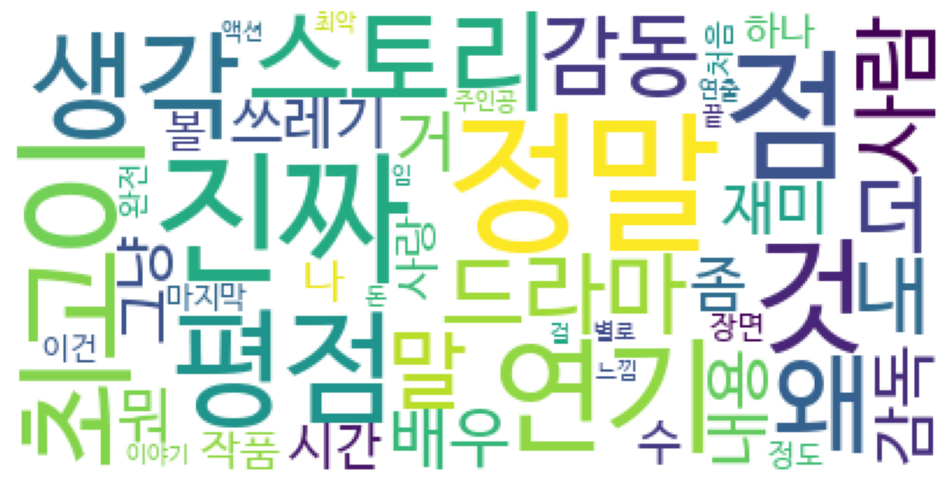

In [22]:
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)

## squarify 트리맵 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [23]:
!pip install squarify

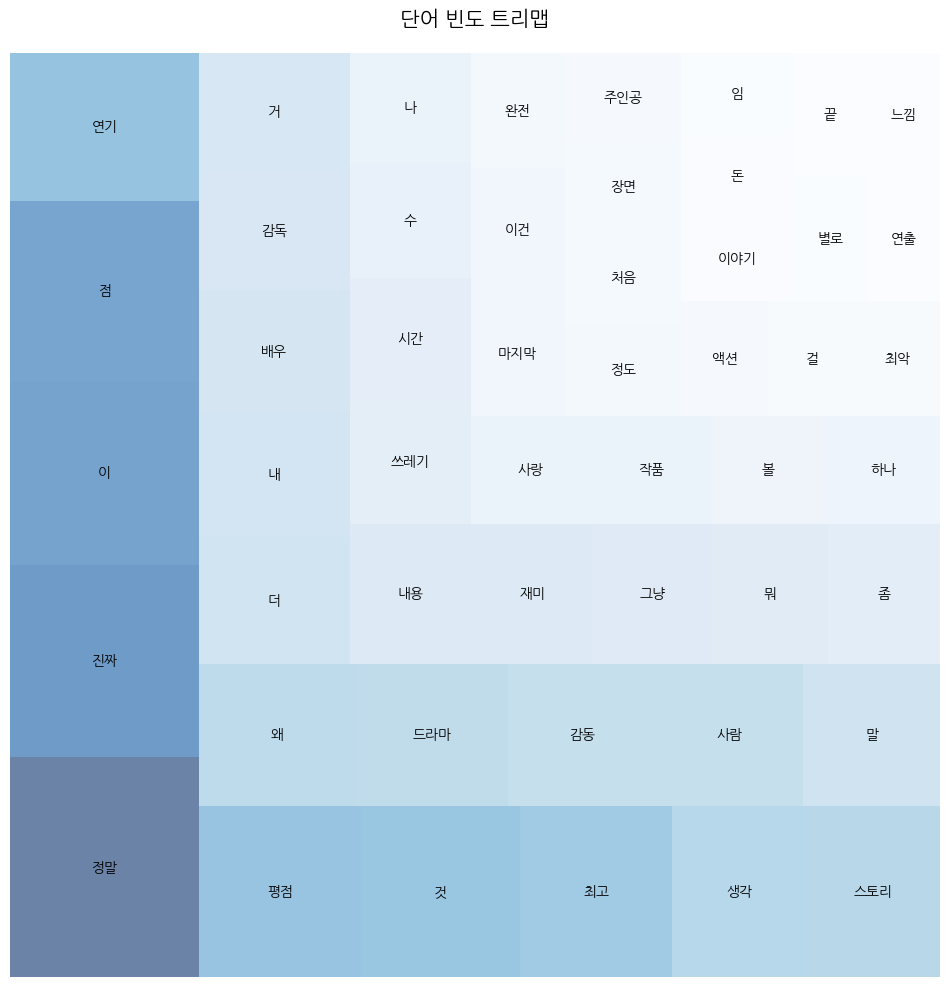

In [27]:
import squarify
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import logging

# 경고 메시지 완전히 숨기기
logging.getLogger('matplotlib.font_manager').disabled = True
warnings.filterwarnings('ignore')

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 색상 정규화
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                         vmax=max(top_nouns.values()))

colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

# 그래프 그리기
plt.figure(figsize=(12, 12))
squarify.plot(sizes=top_nouns.values(),
            label=top_nouns.keys(),
            color=colors,
            alpha=0.6,
            text_kwargs={'fontproperties': font_prop})  # 폰트 속성 추가

plt.title('단어 빈도 트리맵', fontproperties=font_prop, fontsize=15, pad=20)
plt.axis('off')
plt.show()